In [0]:
!git clone https://github.com/tomaszkrzyzek/nn2019_kaggle3_data.git

Cloning into 'nn2019_kaggle3_data'...
remote: Enumerating objects: 20392, done.
remote: Counting objects: 100% (20392/20392), done.
remote: Compressing objects: 100% (10539/10539), done.
remote: Total 20392 (delta 9853), reused 20392 (delta 9853), pack-reused 0
Receiving objects: 100% (20392/20392), 22.00 MiB | 32.84 MiB/s, done.
Resolving deltas: 100% (9853/9853), done.


In [0]:
!pip install gpustat

  Stored in directory: /root/.cache/pip/wheels/2e/7a/86/ae2c167876a53a7519aed8ae8543455f50825384268e1d7245
Successfully built gpustat


In [0]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing
import sklearn.metrics
from scipy import ndimage

In [0]:
filenames_x_train = glob.glob("nn2019_kaggle3_data/distorted/*.jpg")
filenames_y_train = glob.glob("nn2019_kaggle3_data/clean/*.jpg")
filenames_x_test = glob.glob("nn2019_kaggle3_data/test_distorted/*.jpg")

filenames_x_train.sort()
filenames_y_train.sort()
filenames_x_test.sort()

x_train_orig = [cv2.imread(img) for img in filenames_x_train]
y_train_orig = [cv2.imread(img) for img in filenames_y_train]
x_test_orig = [cv2.imread(img) for img in filenames_x_test]

In [0]:
# for img in test:
#     plt.imshow(img)
#     plt.show()

In [0]:
SPLIT = 0.8
x_train = np.asarray(x_train_orig[:int(SPLIT*len(x_train_orig))]) / 255
x_valid = np.asarray(x_train_orig[int(SPLIT*len(x_train_orig)):]) / 255
y_train = np.asarray(y_train_orig[:int(SPLIT*len(x_train_orig))]) / 255
y_valid = np.asarray(y_train_orig[int(SPLIT*len(x_train_orig)):]) / 255

print(len(x_train), len(x_valid), len(y_train), len(y_valid))

8000 2000 8000 2000


In [0]:
x_test = np.asarray(x_test_orig) / 255
x_test = x_test.reshape((400, 48, 48, 3))

In [0]:
# LATENT = 2

# input_layer = tf.keras.layers.Input(shape=(48, 48, 3))

# x = tf.keras.layers.Conv2D(filters=2**(LATENT+2), kernel_size=3, strides=(2, 2))(input_layer) # 23x23x8
# x = tf.keras.layers.ReLU()(x)

# x = tf.keras.layers.Conv2D(filters=2**(LATENT+1), kernel_size=3, strides=(2, 2))(x) # 11x11x16
# x = tf.keras.layers.ReLU()(x) 

# x = tf.keras.layers.Conv2D(filters=2**LATENT, kernel_size=3, strides=(2, 2))(x) # 5x5x32
# x = tf.keras.layers.ReLU()(x)

# # x = tf.keras.layers.Flatten()(x)
# # x = tf.keras.layers.Dense(5*5*2**(LATENT))(x)
# # x = tf.keras.layers.ReLU()(x)

# # x = tf.keras.layers.Reshape((5, 5, 2**(LATENT)))(x)
# x = tf.keras.layers.Conv2DTranspose(filters=2**(LATENT), kernel_size=3, strides=(2, 2))(x) # 11x11x16
# x = tf.keras.layers.ReLU()(x)

# x = tf.keras.layers.Conv2DTranspose(filters=2**(LATENT+1), kernel_size=3, strides=(2, 2))(x) # 23x23x8
# x = tf.keras.layers.ReLU()(x)

# x = tf.keras.layers.Conv2DTranspose(filters=2**(LATENT+2), kernel_size=3, strides=(2, 2), padding='same')(x) # 46x46x3
# x = tf.keras.layers.ReLU()(x)

# x = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=(1, 1))(x) # 48x48x3
# x = tf.keras.layers.Activation('sigmoid')(x)

# model = tf.keras.models.Model(inputs=input_layer, outputs=x)

# model.summary()

In [0]:
LATENT = 3

input_layer = tf.keras.layers.Input(shape=(48, 48, 3))

x = tf.keras.layers.GaussianNoise(.2)(input_layer)

x = tf.keras.layers.Conv2D(filters=2**(LATENT+5), kernel_size=3)(x) 
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(filters=2**(LATENT+4), kernel_size=3)(x) 
x = tf.keras.layers.ReLU()(x) 

x = tf.keras.layers.Conv2D(filters=2**(LATENT+3), kernel_size=3)(x) 
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(filters=2**(LATENT+2), kernel_size=3)(x) 
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(filters=2**(LATENT+1), kernel_size=3)(x) 
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(filters=2**(LATENT), kernel_size=3)(x) 
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2DTranspose(filters=2**(LATENT), kernel_size=3)(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2DTranspose(filters=2**(LATENT+1), kernel_size=3)(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2DTranspose(filters=2**(LATENT+2), kernel_size=3)(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2DTranspose(filters=2**(LATENT+3), kernel_size=3)(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2DTranspose(filters=2**(LATENT+4), kernel_size=3)(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3)(x)
x = tf.keras.layers.Activation('sigmoid')(x)

model = tf.keras.models.Model(inputs=input_layer, outputs=x)

model.summary()

In [0]:
model_directory = '.'
model_name = 'model'

early_stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                              patience=32,
                              verbose=True,
                              mode="auto")

model.compile(optimizer='adam', loss='mse')

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(("%s%s.h5" % (model_directory, model_name)),
                                      monitor="val_loss",
                                      verbose=False,
                                      save_best_only=True,
                                      mode="min")

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=16)

In [0]:
history = model.fit(x_train,
                    y_train,
                    epochs=1024,
                    batch_size=64,
                    validation_data=(x_valid, y_valid),
                    verbose=2,
                    shuffle=True,
                    callbacks=[early_stopper, checkpoint_callback, reduce_lr])

In [0]:
model = tf.keras.models.load_model("%s%s.h5" % (model_directory, model_name))

In [0]:
y_valid_pred = model.predict(x_valid)

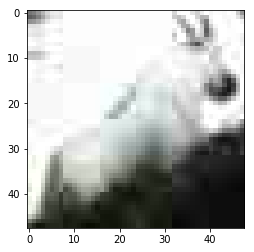

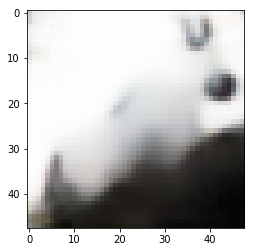

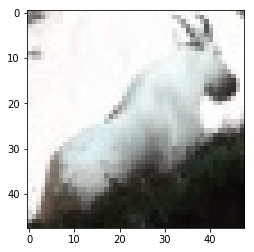

In [0]:
idx = 1

plt.imshow(x_valid[idx])
plt.show()

plt.imshow(y_valid_pred[idx])
plt.show()

plt.imshow(y_valid[idx])
plt.show()

In [0]:
np.sqrt(sklearn.metrics.mean_squared_error(y_valid.reshape(-1), x_valid.reshape(-1)))

0.051738615378986975

In [0]:
y_valid_pred = model.predict(x_valid)
np.sqrt(sklearn.metrics.mean_squared_error(y_valid.reshape(-1), y_valid_pred.reshape(-1)))

0.06624158245281543

In [0]:
y_valid_pred.shape

(2000, 48, 48, 3)

In [0]:
def save_result(images: np.ndarray, out_path: str):
    
    assert images.shape == (400, 3, 48, 48)
    
    flat_img = images.reshape(400, -1)
    n_rows = np.prod(images.shape)
    
    y_with_id = np.concatenate([np.arange(n_rows).reshape(-1, 1), flat_img.reshape(n_rows, 1)], axis=1)
    np.savetxt(out_path, y_with_id, delimiter=",", fmt=['%d', '%.4f'], header="id,expetced", comments='')

In [0]:
y_test_pred = model.predict(x_test)

In [0]:
save_result(y_test_pred.reshape(400, 3, 48, 48), 'submission.csv')